# Test 2020-02-03

## 4.1 함수

$\alpha=0.1$인 leakage ReLU 플롯

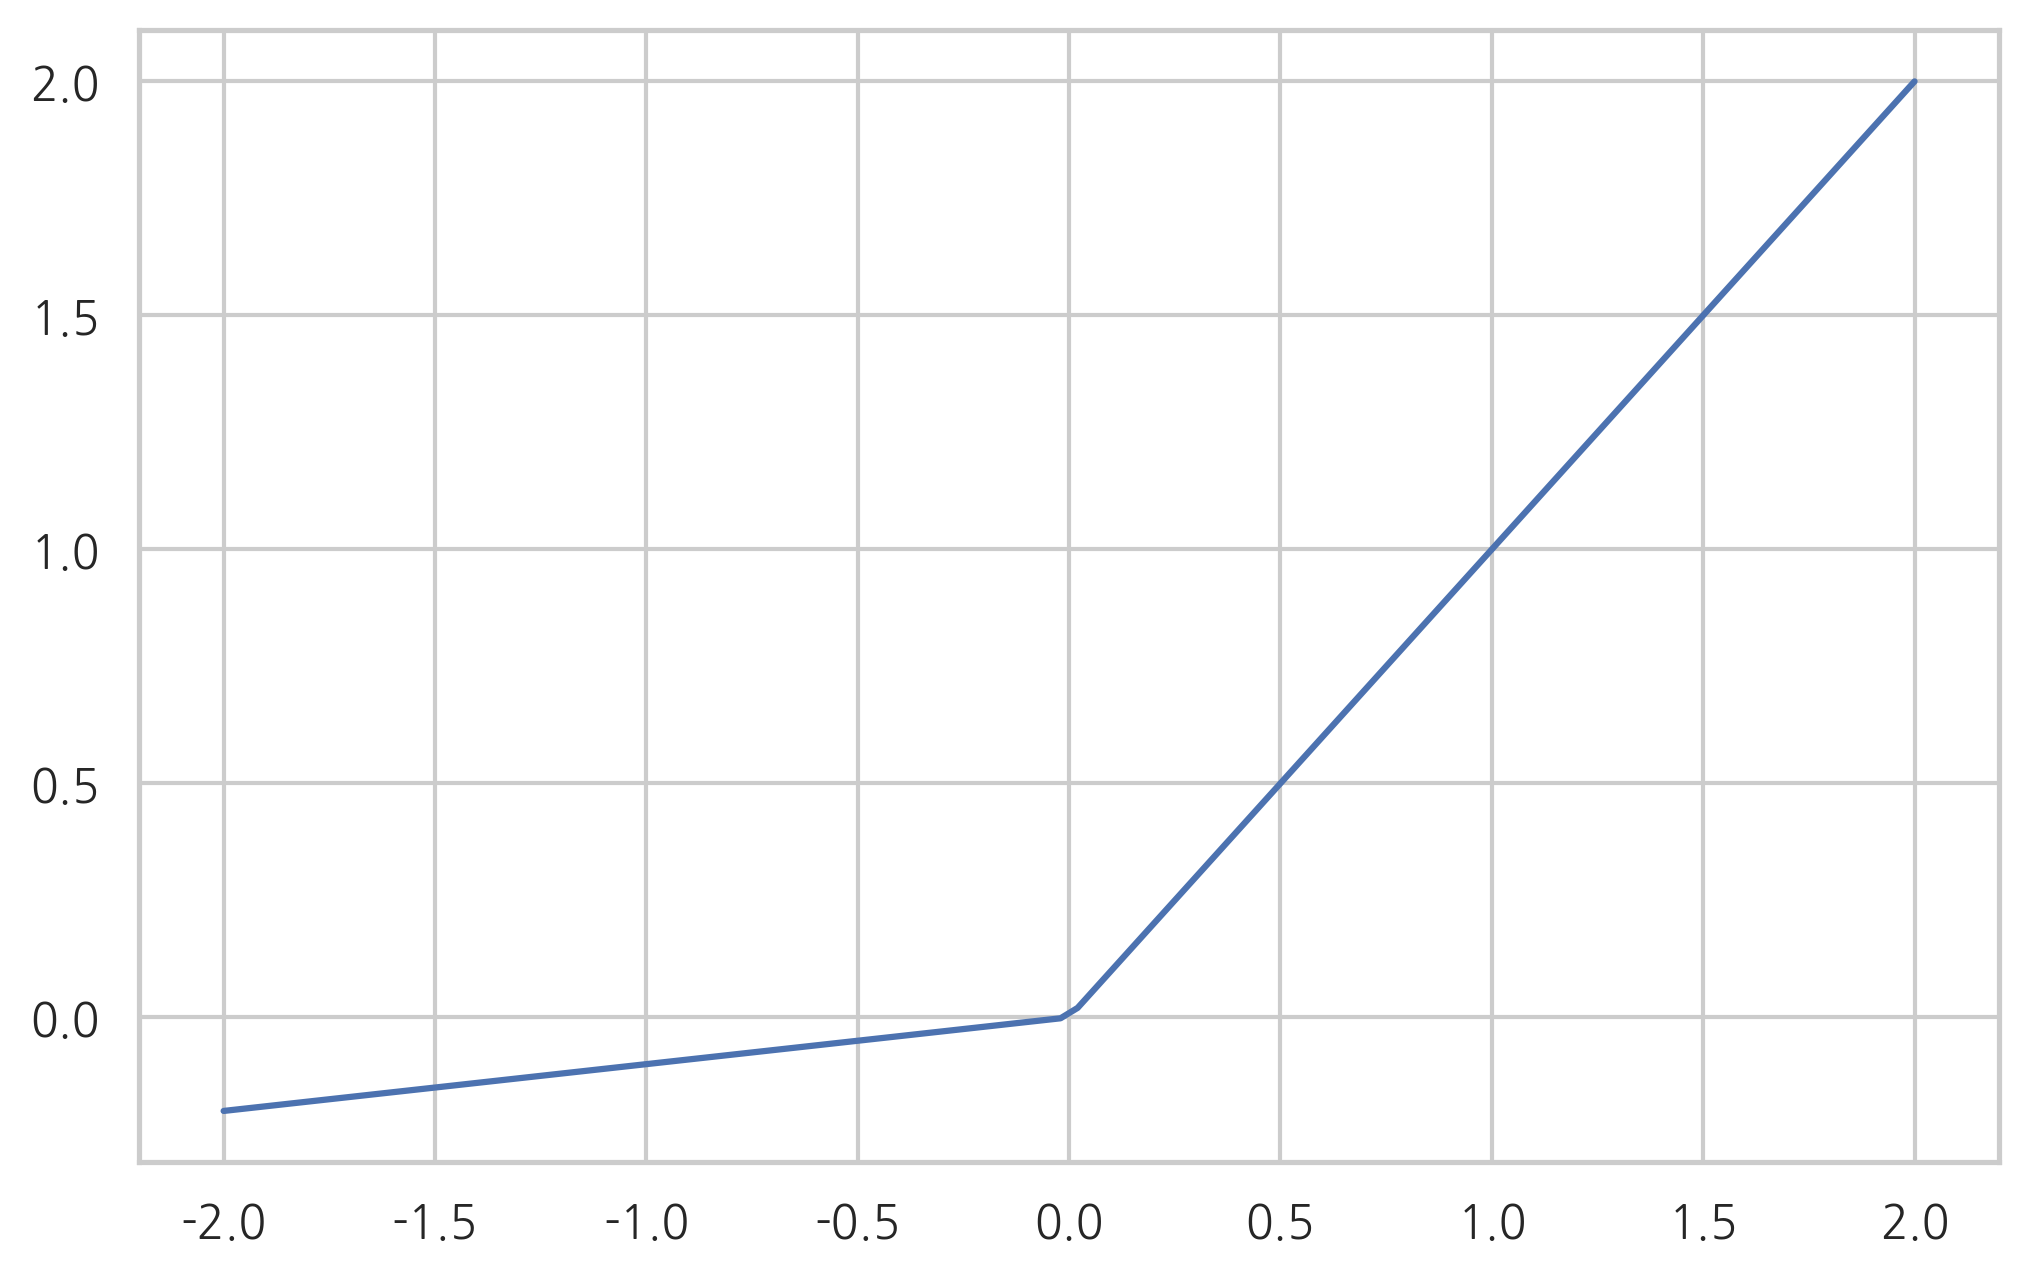

In [2]:
x = np.linspace(-2, 2, 100)
y = np.maximum(0.1 * x, x)
plt.plot(x, y)
plt.show()

### 로그를 이용한 최적화

minimize

$$
\arg\min_x \prod_{i=1}^4 \exp{(x-i)^2}
$$

### Softmax

(1, 2, 3)

1. (0.3, 0.2, 0.5)
2. (0.333333, 0.333333, 0.333333)
3. (0.1, 0.2, 0.3)
4. (0, 0, 1)

## 4.2 심파이를 사용한 함수 미분

In [3]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

3 dimensional Rosenbrock function

$$
f(x) = (1 - x_1)^2 + (1 - x_2)^2 + 100\left( (x_2-x_1^2)^2 + (x_3 - x_2^2)^2 \right)
$$

In [5]:
x1, x2, x3 = sympy.symbols("x1 x2 x3")

f = (1 - x1)**2 + (1 - x2)**2 + 100*((x2-x1**2)**2 + (x3-x2**2)**2)

$\dfrac{\partial f}{\partial x_1}$

In [12]:
sympy.diff(f, x1)

         ⎛    2     ⎞           
- 400⋅x₁⋅⎝- x₁  + x₂⎠ + 2⋅x₁ - 2

$\dfrac{\partial f}{\partial x_2}$

In [9]:
sympy.diff(f, x2)

        2          ⎛    2     ⎞             
- 200⋅x₁  - 400⋅x₂⋅⎝- x₂  + x₃⎠ + 202⋅x₂ - 2

$\dfrac{\partial f}{\partial x_3}$

In [10]:
sympy.diff(f, x3)

        2         
- 200⋅x₂  + 200⋅x₃

$\dfrac{\partial^2 f}{\partial x_1^2}$

In [13]:
sympy.diff(f, x1, x1)

  ⎛      2             ⎞
2⋅⎝600⋅x₁  - 200⋅x₂ + 1⎠

$\dfrac{\partial^2 f}{\partial x_2^2}$

In [14]:
sympy.diff(f, x2, x2)

  ⎛      2               ⎞
2⋅⎝600⋅x₂  - 200⋅x₃ + 101⎠

$\dfrac{\partial^2 f}{\partial x_3^2}$

In [15]:
sympy.diff(f, x3, x3)

200

$\dfrac{\partial^2 f}{\partial x_1x_2}$

In [16]:
sympy.diff(f, x1, x2)

-400⋅x₁

$\dfrac{\partial^2 f}{\partial x_2x_3}$

In [17]:
sympy.diff(f, x2, x3)

-400⋅x₂

$\dfrac{\partial^2 f}{\partial x_3x_1}$

In [18]:
sympy.diff(f, x3, x1)

0

## 4.3 적분

$$
\int e^{-x} dx
$$

In [36]:
x = sympy.symbols("x")
f = sympy.exp(-x)
sympy.integrate(f)

  -x
-ℯ  

$$
\int_0^{\infty} e^{-x} dx
$$

In [37]:
invexp = lambda x: np.exp(-x)

sp.integrate.quad(invexp, 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

## 4.4 행렬의 미분

* gradient vector
* Hessian matrix
* 5 rules

## 5.1 최적화 기초

In [19]:
def f(x):
    return (1 - x[0])**2 + (1 - x[1])**2 + 100*((x[1]-x[0]**2)**2 + (x[2]-x[1]**2)**2)

x0 = (0, 0, 0)  # 초깃값
result = sp.optimize.minimize(f, x0)
print(result)

      fun: 3.6193353620795195e-11
 hess_inv: array([[0.10001061, 0.19854099, 0.39687978],
       [0.19854099, 0.39898752, 0.79771455],
       [0.39687978, 0.79771455, 1.59984493]])
      jac: array([ 5.71735385e-06, -3.96530597e-06,  5.45497780e-07])
  message: 'Optimization terminated successfully.'
     nfev: 185
      nit: 28
     njev: 37
   status: 0
  success: True
        x: array([0.99999732, 0.99999462, 0.99998923])


In [24]:
def fp(x):
    return np.array([2 * (x[0] - 1) - 400 * x[0] * (x[1] - x[0]**2),
                     2 * (x[1] - 1) - 400 * x[1] * (x[2] - x[1]**2) + 200 * (x[1] - x[0] ** 2),
                     200 * (x[2] - x[1]**2)])

In [28]:
fp([0, 0, 0]), sp.optimize.rosen_der([0, 0, 0])

(array([-2, -2,  0]), array([-2, -2,  0]))

In [29]:
fp([1, 0, 0]), sp.optimize.rosen_der([1, 0, 0])

(array([ 400, -202,    0]), array([ 400, -202,    0]))

In [30]:
result = sp.optimize.minimize(f, x0, jac=fp)
print(result)

      fun: 1.9237776479187036e-14
 hess_inv: array([[0.09997913, 0.19848124, 0.3967629 ],
       [0.19848124, 0.39887784, 0.79749982],
       [0.3967629 , 0.79749982, 1.5994276 ]])
      jac: array([ 5.46870420e-06, -3.63809110e-06,  4.44125603e-07])
  message: 'Optimization terminated successfully.'
     nfev: 37
      nit: 28
     njev: 37
   status: 0
  success: True
        x: array([1.        , 0.99999999, 0.99999998])


## 5.2 제한조건이 있는 최적화 문제

$$
\arg \max xy
$$

$$
x^2 + y^2 \leq 1
$$

$$
y \geq 0
$$

In [55]:
def f(x):
    return -x[0] * x[1]

def c1(x):
    return 1 - (x[0] ** 2 + x[1] ** 2)

def c2(x):
    return x[1]


sp.optimize.fmin_slsqp(f, np.array([1, 1]), ieqcons=[c1, c2])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.49999999999987327
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([0.70710678, 0.70710678])

## 5.3 선형계획법 문제와 이차계획법 문제

* 농부 
* 110 헥타르 
* 밀 또는 보리
* 밀: 비료 100만원, 순이익 50만원, 노동력 10시간
* 보리: 비료 200만원, 순이익 120만원, 노동력 30시간
* 비료값: 1억원
* 노동력 1200시간

In [53]:
c = [-50, -120]
A = [[100, 200], [10, 30]]
b = [10000, 1200]

res = sp.optimize.linprog(c, A, b)
print(res)

     con: array([], dtype=float64)
     fun: -5399.999996802761
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([5.92342803e-06, 7.10105269e-07])
  status: 0
 success: True
       x: array([59.99999996, 19.99999999])


## 6.2 확률의 수학적 정의와 의미

주식

* 1년 후 2배 오르거나(U) 혹은 1/2로 내리거나(D) (가능성이 같다)
* 2년 후의 주식 가격
* 표본 공간
* 확률